# Time series forecasting using Arima

Following: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/df_analysis.csv")
df = df[['ds', 'y']]
df['ds'] = pd.to_datetime(df['ds'])
df.index = df['ds']
df = df.drop(columns = ['ds'])
df = df.resample('H').mean()

## How to find the order of differencing (d) for the ARIMA model

In [42]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.670377
p-value: 0.000000


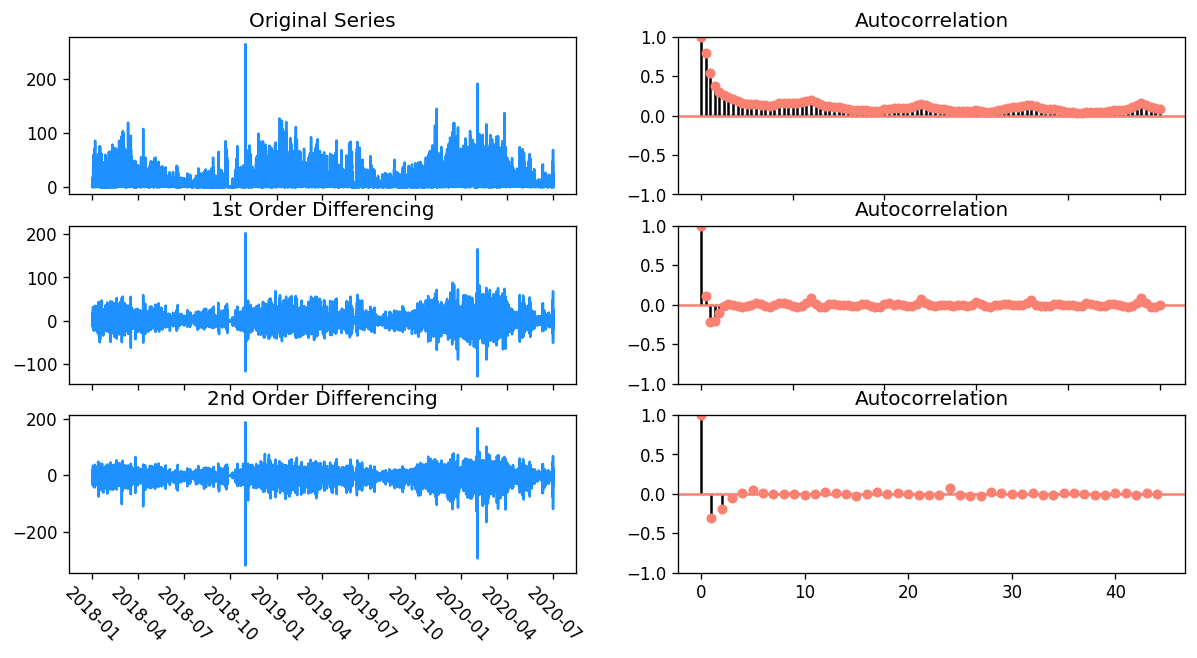

In [5]:
import numpy as np, pandas as pd
import statsmodels.api as sm
# from statsmodels.graphics.tsa import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Original Series
# fig, axes = plt.subplots(3, 2, sharex = True)
# axes[0, 0].plot(df.y); axes[0, 0].set_title('Original Series')
# sm.graphics.tsa.plot_acf(df.y.dropna(), ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df.y.diff()); axes[1, 0].set_title('1st Order Differencing')
# sm.graphics.tsa.plot_acf(df.y.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# sm.graphics.tsa.plot_acf(df.y.diff().diff().dropna(), ax=axes[2, 1])




fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(421)
ax1.plot(df.y, color = 'dodgerblue')
ax1.set_title('Original Series')
plt.tick_params('x', labelbottom=False)

ax2 = plt.subplot(422)
sm.graphics.tsa.plot_acf(df.y.dropna(), ax=ax2, lags = 100, color = 'salmon')
plt.tick_params('x', labelbottom=False)

ax3 = plt.subplot(423)
ax3.plot(df.y.diff(), color = 'dodgerblue'); 
ax3.set_title('1st Order Differencing')
plt.tick_params('x', labelbottom=False)

ax4 = plt.subplot(424)
sm.graphics.tsa.plot_acf(df.y.diff().dropna(), ax=ax4, lags = 100, color = 'salmon')
plt.tick_params('x', labelbottom=False)

ax5 = plt.subplot(425)
ax5.plot(df.y.diff().diff(), color = 'dodgerblue')
ax5.set_title('2nd Order Differencing')
ax5.tick_params(axis='x', labelrotation = -45)

ax6 = plt.subplot(426)
sm.graphics.tsa.plot_acf(df.y.diff().diff().dropna(), ax=ax6, color = 'salmon')

plt.show()
fig.savefig("autocorrelations.svg", dpi = 500)

## Tentatively fix the order of differencing as 1

In [4]:
from pmdarima.arima.utils import ndiffs
y = df.y.dropna()

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

0

## Finding the order of the AR term (p)

Take the order of the AR term to be equal as the amount of lags it takes to cross the significane limit in the Partial ACF plot

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


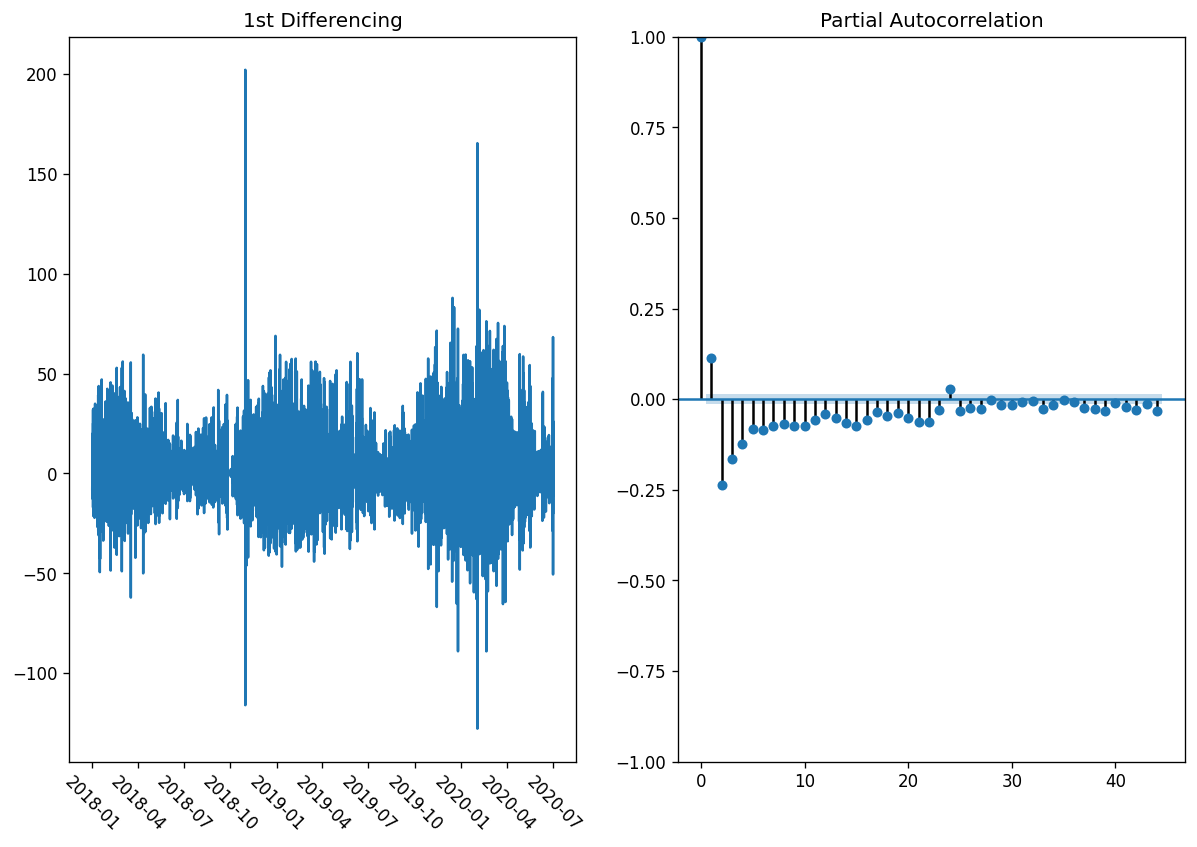

In [10]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(121)
ax1.plot(df.y.diff().dropna())
ax1.set_title('1st Differencing')
ax1.tick_params(axis='x', labelrotation = -45)

ax2 = plt.subplot(122)
ax2.set(ylim=(0,5))
sm.graphics.tsa.plot_pacf(df.y.diff().dropna(), ax = ax2)

plt.show()

Tentively fix the p as 2 but could be 27

## How to find the MA term (q)

Look at the ACF plot

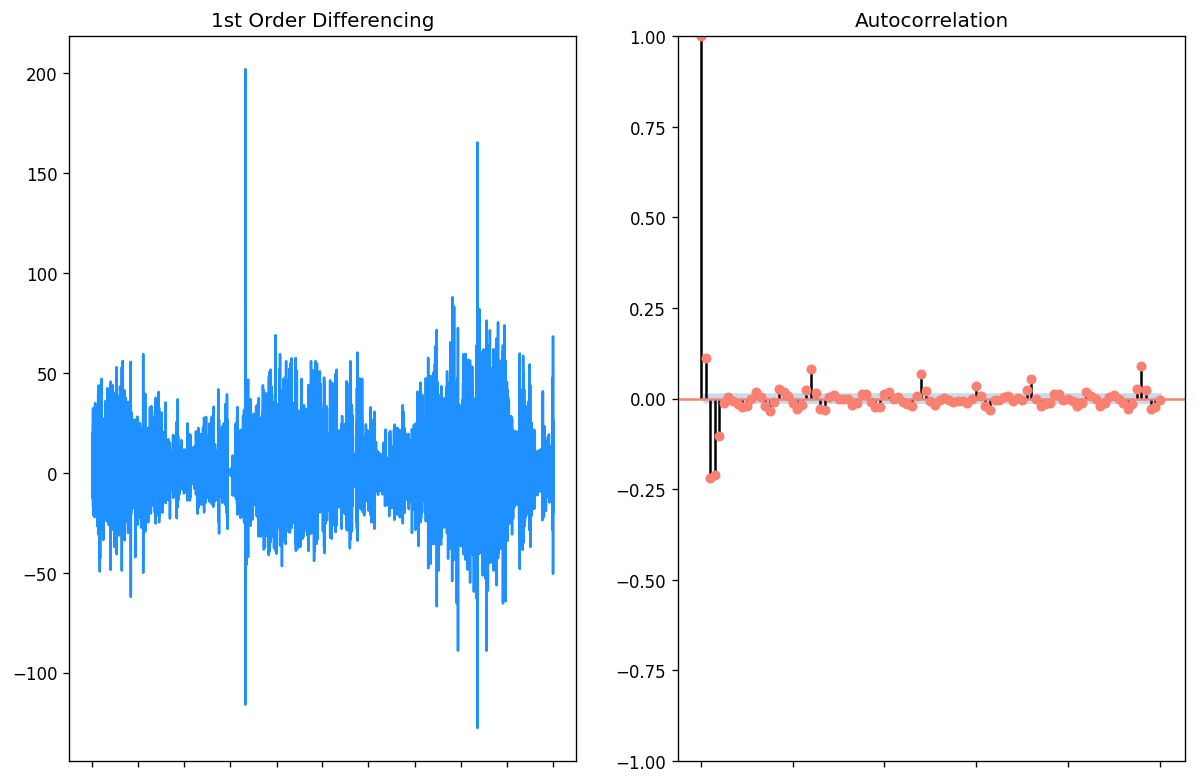

In [11]:

fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(121)
ax1.plot(df.y.diff(), color = 'dodgerblue'); 
ax1.set_title('1st Order Differencing')
plt.tick_params('x', labelbottom=False)

ax2 = plt.subplot(122)
sm.graphics.tsa.plot_acf(df.y.diff().dropna(), ax=ax2, lags = 100, color = 'salmon')
plt.tick_params('x', labelbottom=False)


Start with 2 but might be 5

## Build ARIMA model with p, d, q values

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# 2,1,2 ARIMA Model
model_212 = ARIMA(df.y, order=(2,1,2))
model_fit_212 = model_212.fit()
print(model_fit_212.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                21888
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -80301.723
Date:                Thu, 12 May 2022   AIC                         160613.445
Time:                        19:24:32   BIC                         160653.413
Sample:                    01-01-2018   HQIC                        160626.465
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7556      0.018     42.804      0.000       0.721       0.790
ar.L2         -0.1016      0.015     -6.941      0.000      -0.130      -0.073
ma.L1         -0.7650      0.018    -43.666      0.0

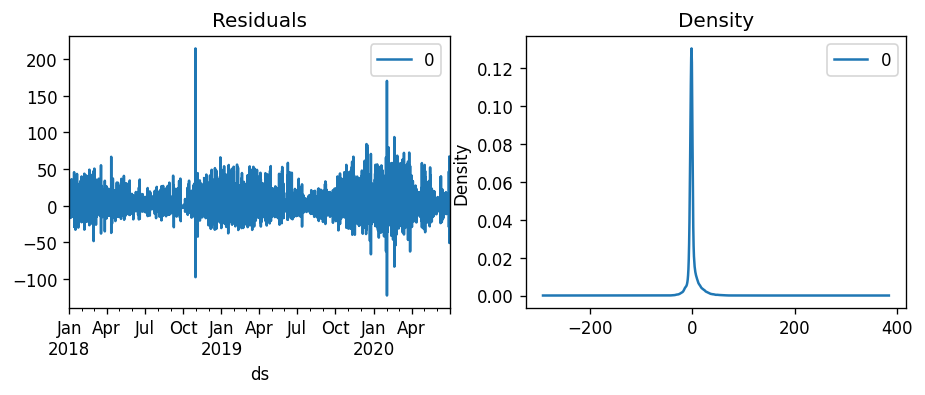

In [20]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_212.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [21]:
# 2,1,5 ARIMA Model
model_215 = ARIMA(df.y, order=(2,1,5))
model_fit_215 = model_215.fit()
print(model_fit_215.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                21888
Model:                 ARIMA(2, 1, 5)   Log Likelihood              -80262.933
Date:                Thu, 12 May 2022   AIC                         160541.867
Time:                        19:25:30   BIC                         160605.816
Sample:                    01-01-2018   HQIC                        160562.698
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2986      0.107      2.784      0.005       0.088       0.509
ar.L2          0.3161      0.069      4.602      0.000       0.181       0.451
ma.L1         -0.3082      0.107     -2.873      0.0

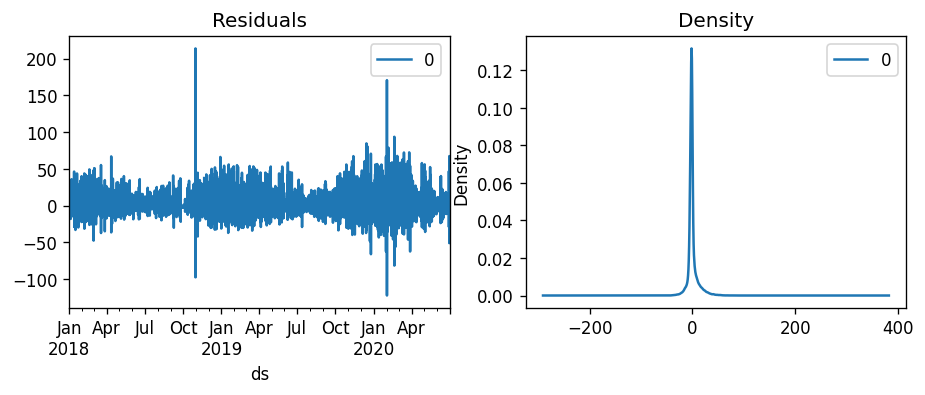

In [22]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_215.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [23]:
# 27,1,5 ARIMA Model
model_2715 = ARIMA(df.y, order=(27,1,5))
model_fit_2715 = model_2715.fit()
print(model_fit_2715.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                21888
Model:                ARIMA(27, 1, 5)   Log Likelihood              -80144.846
Date:                Thu, 12 May 2022   AIC                         160355.692
Time:                        19:32:09   BIC                         160619.482
Sample:                    01-01-2018   HQIC                        160441.621
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5355      0.213     -2.515      0.012      -0.953      -0.118
ar.L2         -0.2977      0.116     -2.567      0.010      -0.525      -0.070
ar.L3         -0.0368      0.125     -0.293      0.7

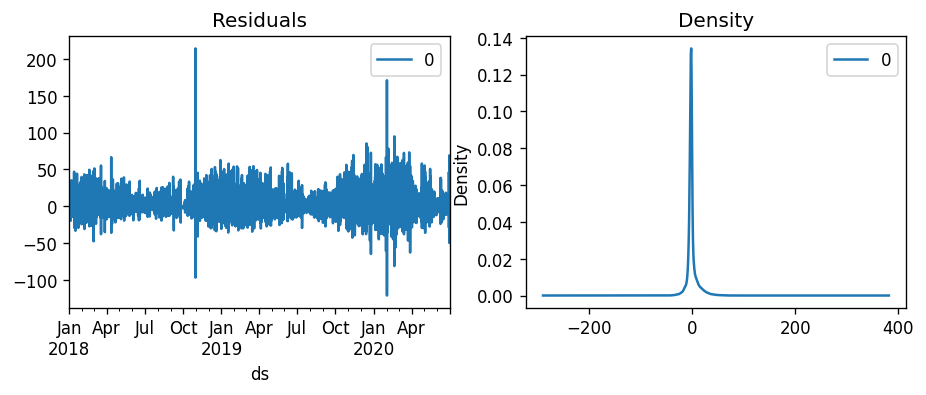

In [24]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_2715.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [37]:
# Actual vs Fitted
fitted = model_fit_212.predict(min(df.index), max(df.index))


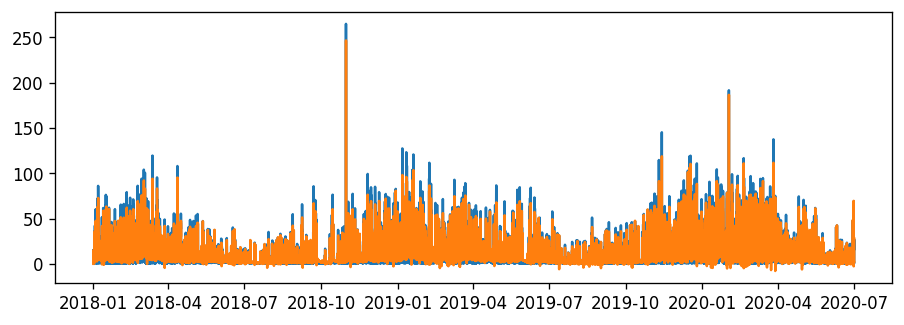

In [42]:
plt.plot(df.y)
plt.plot(fitted)


## Out-of-Time Cross Validation

In [91]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.y[:-10]
test = df.y[-10:]

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


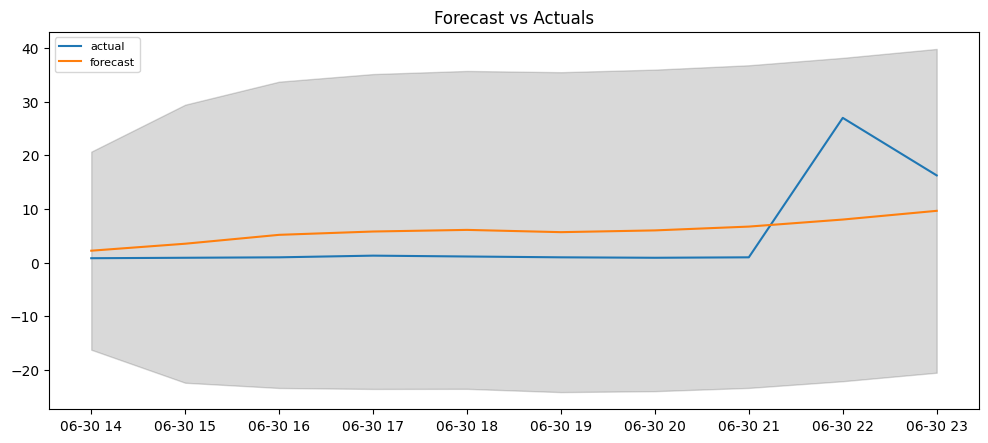

In [94]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model_2715 = ARIMA(train, order=(27, 1, 5))  
fitted = model_2715.fit()  

# Forecast
fc = fitted.get_forecast(15, alpha=0.05)  # 95% conf
conf = fc.conf_int()

# Make as pandas series
fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf['lower y'], index=test.index)
upper_series = pd.Series(conf['upper y'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-10:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

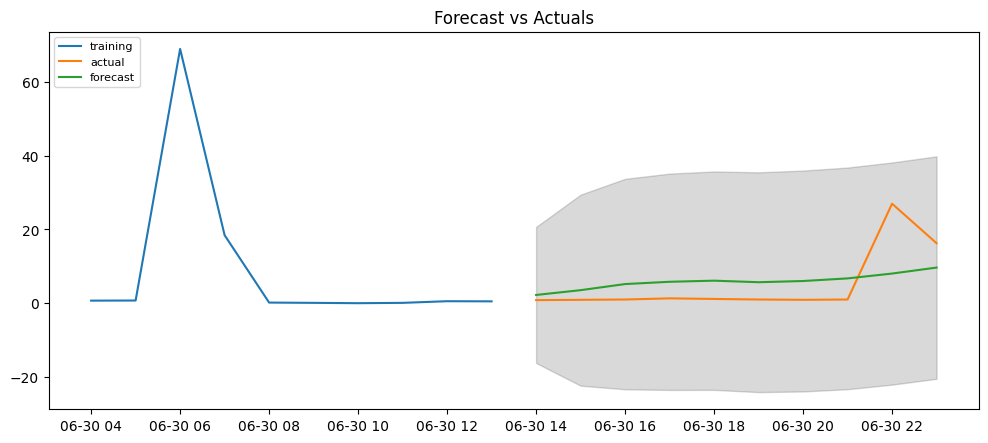

In [95]:

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-10:], label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [88]:
fc.fittedvalues()

AttributeError: ignored

# TRY DOING IT FOR DAILY VALUES